# Model 6a: Embedding-Based Model (Universal Sentence Encoder + Logistic Regression)

## 🎯 Objective:
Use a pretrained embedding model (Universal Sentence Encoder) to capture deep semantic meaning of headlines, and apply a simple classifier (e.g., Logistic Regression) on top.

## 🔧 Steps:
1. Import Libraries & Load Data
    - Load data.csv as usual
    - Prepare X_train, X_test, y_train, y_test

2. Text Embedding
    - Use Universal Sentence Encoder (USE) via tensorflow_hub
    - Encode each headline into a 512-dimensional dense vector

3. Model Training
    - Use LogisticRegression on the embedded vectors

5. Evaluation
    - Accuracy, classification report

6. Confusion matrix

7. Save Model Eval Metrics

8. Save trained model

##  ✅ Purpose:
Leverage semantic-rich embeddings instead of hand-crafted features (TF-IDF). This gives a dense **representation of meaning**, and allows comparison with classical models from Model 0 and 2.

## 1. Import Librairies and load data

In [2]:
import pandas as pd
import numpy as np
import tensorflow_hub as hub
import tensorflow as tf
import time

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

from model_eval import save_model_results, save_trained_model


In [3]:
df = pd.read_csv("data/training_data_lowercase.csv", sep="\t", header=None, names=["label", "title"])
# data.reset_index(drop=True, inplace=True)  # optional

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(df["title"], df["label"], test_size=0.2, random_state=42)

df.head()

,label,title
0,0,donald trump sends out embarrassing new year‚s...
1,0,drunk bragging trump staffer started russian c...
2,0,sheriff david clarke becomes an internet joke ...
3,0,trump is so obsessed he even has obama‚s name ...
4,0,pope francis just called out donald trump duri...


## 2. Text embbeding

### Load Universal Sentence Encoder (USE)

In [4]:
# Load pretrained USE model (takes a moment the first time)
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
print("USE model loaded.")

USE model loaded.


### Embed the Text:

In [5]:
# Convert Series to list (required for USE)
X_train_emb = embed(X_train.tolist())
X_test_emb = embed(X_test.tolist())

## 3. Train Logistic Regression:

In [6]:
# Model training
start_time = time.time()
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_emb, y_train)
training_time_minutes = (time.time() - start_time) / 60

## 4. Evaluation:

In [7]:
# Evaluation
y_pred = clf.predict(X_test_emb)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9244620114185331
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      3529
           1       0.91      0.93      0.92      3302

    accuracy                           0.92      6831
   macro avg       0.92      0.92      0.92      6831
weighted avg       0.92      0.92      0.92      6831



## 5. Confusion Matrix Plot:

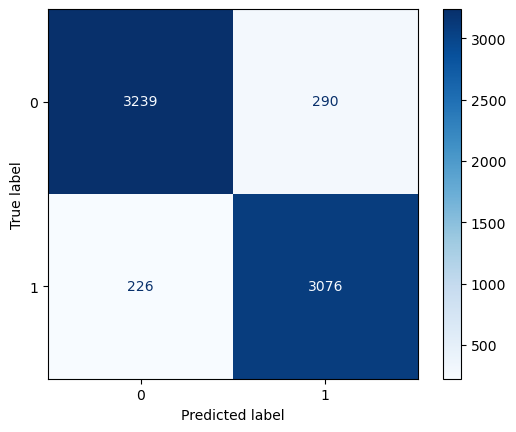

In [8]:
# Optional: show confusion matrix
ConfusionMatrixDisplay.from_estimator(clf, X_test_emb, y_test, cmap="Blues")

## 6. Save Model Eval Metrics

In [9]:
# 📊 Metrics
model_name="model6a_use_lr"
test_accuracy = accuracy_score(y_test, y_pred)
train_accuracy = accuracy_score(y_train, clf.predict(X_train_emb))
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred).tolist()
class_report = classification_report(y_test, y_pred, output_dict=True)

# 📁 Save results
save_model_results(
    model_name=model_name,
    display_name="Model 6a: USE + Logistic Regression",
    accuracy=test_accuracy,
    training_time_minutes=training_time_minutes,
    model_architecture="Logistic Regression with Universal Sentence Encoder embeddings",
    preprocessing_type="universal_sentence_encoder",
    hyperparameters={
        "embedding_source": "TF Hub Universal Sentence Encoder",
        "embedding_type": "512-d sentence vector",
        "C": clf.C,
        "max_iter": clf.max_iter,
        "random_state": clf.random_state
    },
    train_accuracy=train_accuracy,
    test_accuracy=test_accuracy,
    confusion_matrix=conf_matrix,
    classification_report=class_report,
    dataset_info={
        "training_samples": len(X_train_emb),
        "test_samples": len(X_test_emb),
        "embedding_dimensions": X_train_emb.shape[1],
        "embedding_source": "https://tfhub.dev/google/universal-sentence-encoder/4"
    }
)

Results saved to results/model6a_use_lr_results.json
Model: Model 6a: USE + Logistic Regression
Accuracy: 0.9245 (92.45%)
Training Time: 0.00 minutes


## 7. Save trained model

In [10]:
save_trained_model(clf, model_name)

✅ Model saved: trained_models\model6a_use_lr_20250529_163306.joblib


'trained_models\\model6a_use_lr_20250529_163306.joblib'